In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data

In [3]:
train=pd.read_csv("D:\\Course\\Python\\Datasets\\Google_Stock_Price_Train.csv")

# predict the stock for year 2017

In [4]:
train

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"


In [5]:
dataset_open = train['Open']
dataset_open

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [6]:
# i will consider my input and outpur variable from same column 
# i will be taking last few days data as input varailabe say last 60 observation are inputs.
#Input varilable 0 - 59  Output varilable : 60 
#                1 - 60                   : 61
#                2 - 61                   : 62
#               3 - 62                    : 63


In [8]:
# we are focus is only open column so we will consider only that column for stock analysis
train=train.iloc[:,1:2].values

In [9]:
train  # open column 

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [10]:
train.ndim

2

In [11]:
# scale the dataset 
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train=sc.fit_transform(train)

In [12]:
train # data set is scaled only by considering the column " open" from the main dataset

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [13]:
# Creating empty list for xtrain and Ytrain

x_train=[] # all input will be 
y_train=[] # output

In [14]:
train.shape

(1258, 1)

In [15]:
for i in range(60,1258):
    x_train.append(train[i-60:i,:]) # 0:60,:
    y_train.append(train[i,:])# 60

In [16]:
type(x_train)

list

In [17]:
x_train=np.array(x_train)

In [18]:
y_train=np.array(y_train)

In [21]:
x_train.shape # ( rows, input in each row ,column)

(1198, 60, 1)

In [24]:
y_train.shape

(1198, 1)

# Building NN Model

In [25]:
from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers import Dense
from keras.layers import Dropout

# Init the NN model

In [26]:
model=Sequential()

In [27]:
#x_train.shape

In [29]:
# input_shape = num of independent variables 
# unit = number of output from Layers 
# Return Sequence will tell whether we are adding one more layer or not 
model.add(LSTM(return_sequences=True,input_shape=(x_train.shape[1],1),units=50))

In [ ]:
#LSTM have more chances of Overfitting 
# dropout layer will remove some neurons which are causing Overfitting problem


In [30]:
# if we have same context in cell then there is chances of Over fitting to so we have to remove that using Drop out 
# Drop out will remove some unwanted neurons 

model.add(Dropout(0.2))

In [31]:
# its hidden layer so we dont pass input shape and Adding the multiple Hidden layer

model.add(LSTM(return_sequences=True,units=50))
model.add(Dropout(0.2))

In [32]:
model.add(LSTM(return_sequences=True,units=50))
model.add(Dropout(0.2))

In [33]:
model.add(LSTM(return_sequences=False,units=50))
model.add(Dropout(0.2))

# Add Output layer

In [34]:
# we have to add activation function but data am adding here is related to regression model and if we user activatoin fucnction relu
# it will give only positive value but thats not correct way because am fine with out put negative also 

model.add(Dense(kernel_initializer="random_uniform",units=1))

# Compile the model

In [35]:
#binary cross entory for binary 
#for regression we will use LSE 
# optimizer tells method how to update the weights using Gradient Descent Method

model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mse"])

In [36]:
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0945 - mse: 0.0945
Epoch 2/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0069 - mse: 0.0069
Epoch 3/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0058 - mse: 0.0058
Epoch 4/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056 - mse: 0.0056
Epoch 5/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0050 - mse: 0.0050
Epoch 6/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0047 - mse: 0.0047
Epoch 7/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0053 - mse: 0.0053
Epoch 8/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045 - mse: 0.0045
Epoch 9/50
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0041 - mse: 0.0041A: 4s
Epoch 10/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041 - mse: 0.0041
Epoch 11/50
1198/1198 [=

In [37]:
model

In [39]:
train_data=pd.read_csv("D:\\Course\\Python\\Datasets\\Google_Stock_Price_Train.csv")

In [40]:
test_data=pd.read_csv("D:\\Course\\Python\\Datasets\\Google_Stock_Price_Test.csv")

In [41]:
dataset=pd.concat([train_data,test_data])

In [42]:
dataset

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"


In [43]:
len(dataset)-len(test_data)-60 

1198

In [44]:
# last 60 values from train data and 20 from Test Data 

test=dataset.iloc[len(dataset)-len(test_data)-60:,:] #{1198:1279 will be my testing dataset}
#dataset.iloc[1198:,:]

In [45]:
test

,Date,Open,High,Low,Close,Volume
1198,10-06-2016,779.00,780.48,775.54,776.86,"10,70,700"
1199,10-07-2016,779.66,779.66,770.75,775.08,"9,33,200"
1200,10-10-2016,777.71,789.38,775.87,785.94,"11,74,900"
1201,10-11-2016,786.66,792.28,780.58,783.07,"13,72,500"
1202,10-12-2016,783.76,788.13,782.06,786.14,"9,37,400"
...,...,...,...,...,...,...
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"


In [46]:
test=test["Open"].values

In [47]:
test.shape

(80,)

In [48]:
test=test.reshape(80,1)

In [49]:
test=sc.transform(test)

In [50]:
x_test=[]
y_test=[]

In [51]:
for i in range(60,80):
    x_test.append(test[i-60:i,:])
    y_test.append(test[i,:])

In [52]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [53]:
x_test.shape

(20, 60, 1)

In [54]:
y_test.shape

(20, 1)

In [55]:
y_pred = model.predict(x_test)

In [56]:
y_pred

array([[0.93024474],
       [0.92800367],
       [0.9257218 ],
       [0.923677  ],
       [0.922403  ],
       [0.92252237],
       [0.92411727],
       [0.92670804],
       [0.92980933],
       [0.932978  ],
       [0.93587476],
       [0.93826085],
       [0.94003487],
       [0.9412984 ],
       [0.9421792 ],
       [0.94338745],
       [0.945424  ],
       [0.9485529 ],
       [0.9523523 ],
       [0.9555291 ]], dtype=float32)

In [48]:
y_test

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
mean_squared_error(y_test,y_pred)

0.0028292772306091193

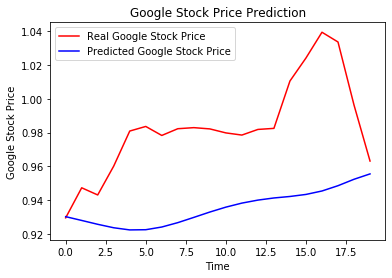

In [59]:
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()